Импортируем нужные библиотеки

In [24]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).**

Считываем датасет

In [25]:
data = pd.read_csv('Student_Performance.csv')
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Заменяем колонки валидными значениями

In [4]:
data['Extracurricular Activities'].replace({
    'Yes': 1,
    'No': 0
}, inplace=True)

Введём синтетический признак - Уровень мотивации студента. Чем больше студент учится, больше решает контрольных работ и при этом меньше спит(сильно мотивирован,что нет времени на сон), тем больше мотивация.


In [5]:
data['Motivation'] = data['Hours Studied'] + data['Sample Question Papers Practiced'] -data['Extracurricular Activities']

Определение основных статистических показателей



In [6]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
 6   Motivation                        10000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 547.0 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499

Визуализация

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>,
        <Axes: title={'center': 'Extracurricular Activities'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>],
       [<Axes: title={'center': 'Motivation'}>, <Axes: >, <Axes: >]],
      dtype=object)

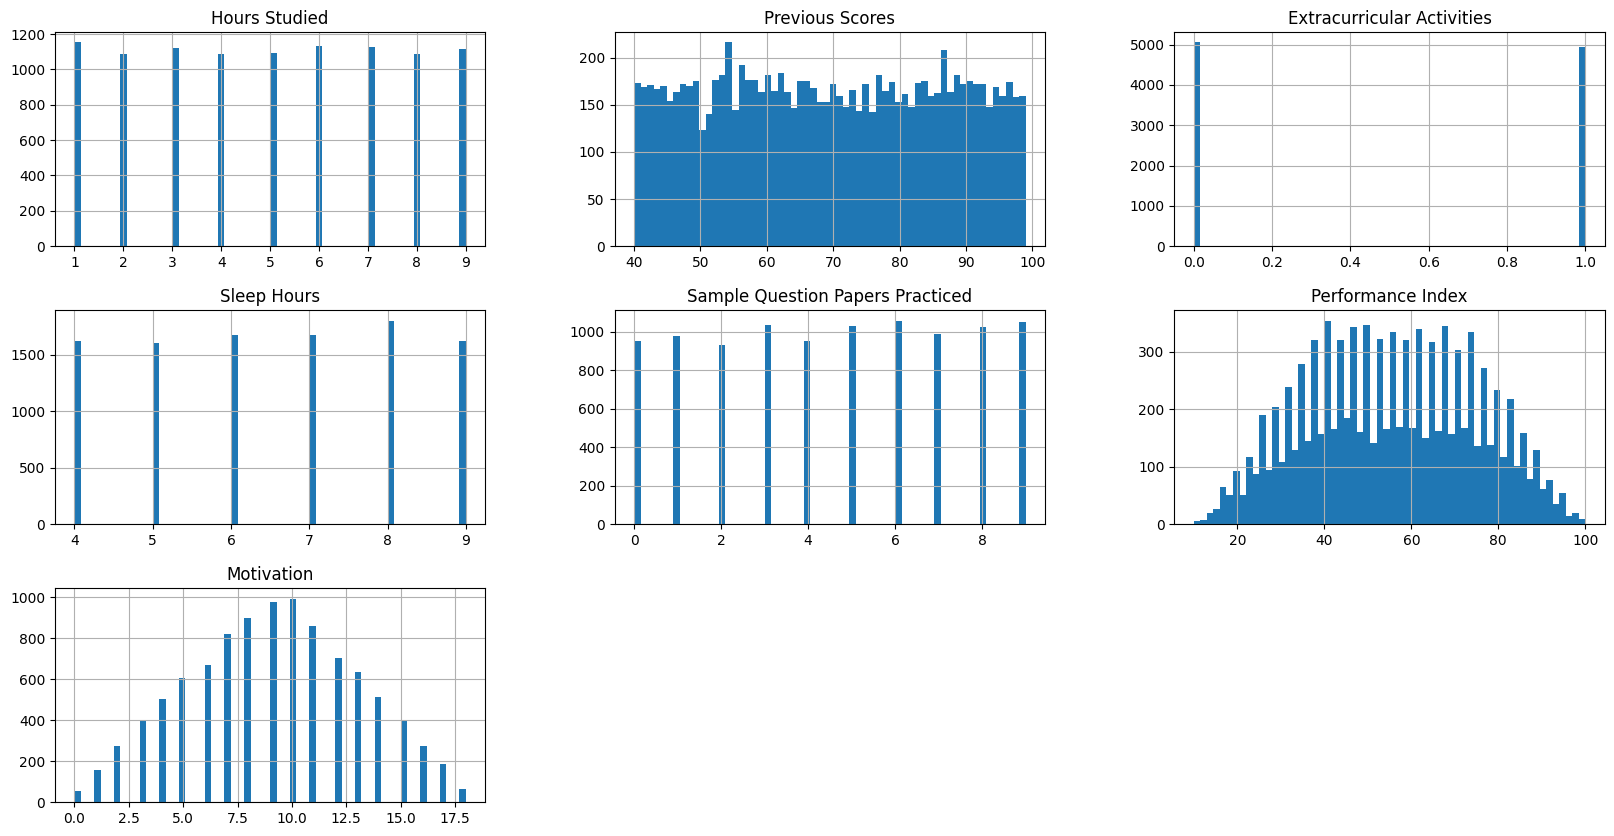

In [7]:
data.hist(bins=60, figsize=(20, 10))


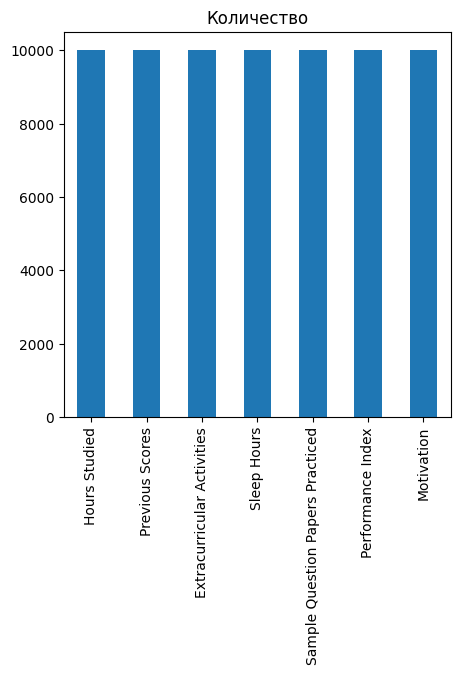

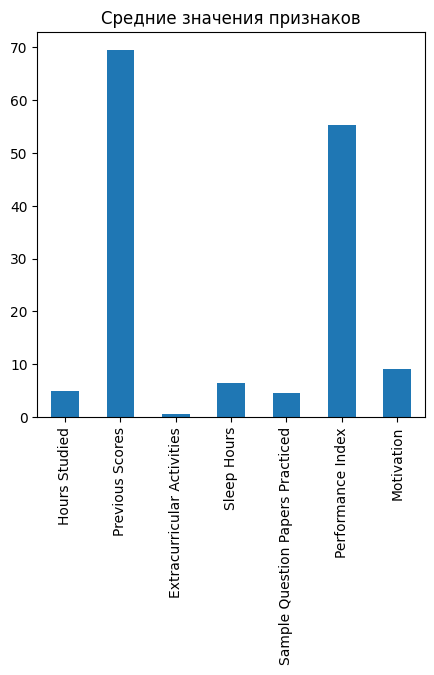

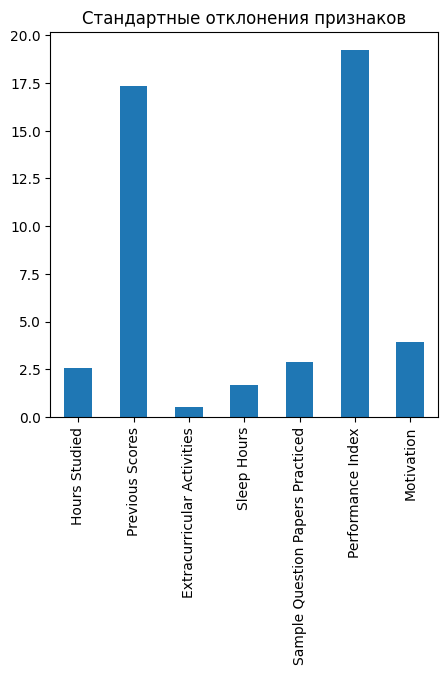

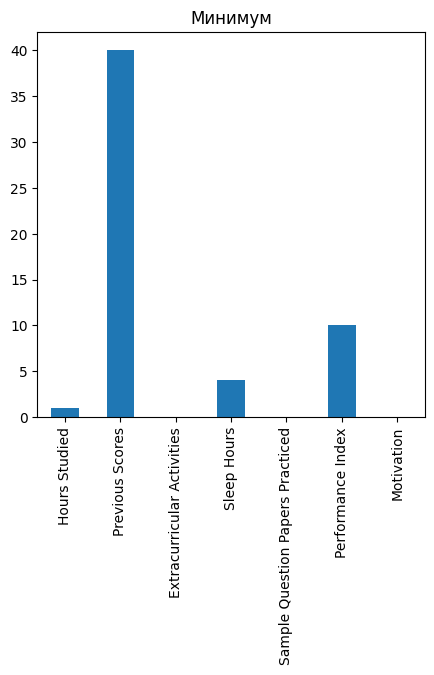

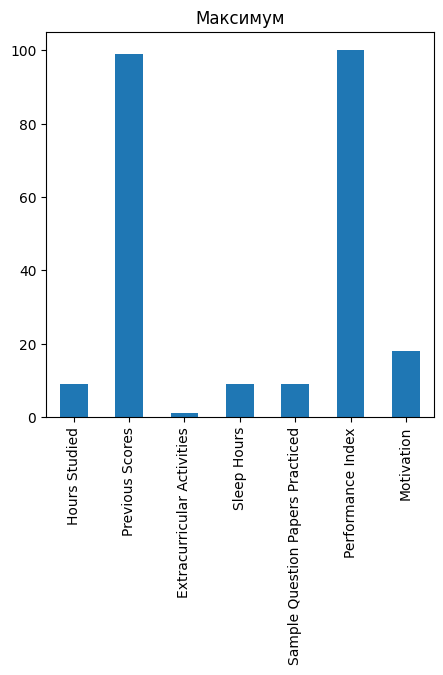

In [8]:
plt.rcParams['figure.figsize'] = [5, 5]
# Визуализация количества
data_count = data.count()
data_count.plot(kind='bar', title='Количество')
plt.show()

# Визуализация средних значений
data_means = data.mean()
data_means.plot(kind='bar', title='Средние значения признаков')
plt.show()

# Визуализация стандартных отклонений
data_std = data.std()
data_std.plot(kind='bar', title='Стандартные отклонения признаков')
plt.show()

# Визуализация минимума
data_min = data.min()
data_min.plot(kind='bar', title='Минимум')
plt.show()

# Визуализация максимума
data_max = data.max()
data_max.plot(kind='bar', title='Максимум')
plt.show()

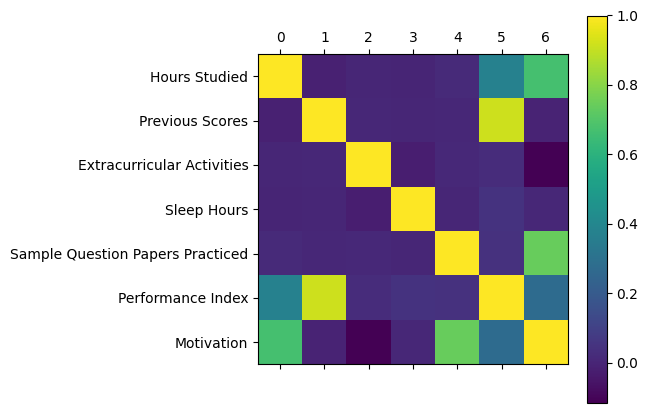

In [19]:
plt.matshow(data.corr())
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()

In [23]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Motivation
Hours Studied,1.00,-0.01,0.00,0.00,0.02,0.37,0.67
Previous Scores,-0.01,1.00,0.01,0.01,0.01,0.92,-0.00
Extracurricular Activities,0.00,0.01,1.00,-0.02,0.01,0.02,-0.12
Sleep Hours,0.00,0.01,-0.02,1.00,0.00,0.05,0.01
Sample Question Papers Practiced,0.02,0.01,0.01,0.00,1.00,0.04,0.74
Performance Index,0.37,0.92,0.02,0.05,0.04,1.00,0.28
Motivation,0.67,-0.00,-0.12,0.01,0.74,0.28,1.00


Здесь мы можем заметить, что выявлена корреляция целевой переменной Perfomance Index с переменными Hours Studied, Previous Scores и Motivation. Чем больше индекс производительности, тем больше мы учимся и выше баллы и мотивация.

# **Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.**

In [10]:
# Обработка отсутствующих значений (замена NaN средними значениями)
data.fillna(data.mean(), inplace=True)
# Категориальных признаков не выявлено, в самом начале были заменены Yes и No

# Нормировка данных (приведение к единому масштабу)
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

X = data.drop(columns=['Performance Index'])
X = standardize_data(X)


# **Разделите данные на обучающий и тестовый наборы данных.**

In [11]:
# Определяем зависимую переменную (целевую) и признаки
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']

# Разделение на обучающий и тестовый наборы
def train_test_split_custom(X, y, test_size=0.2):
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)

    # Генерация случайных индексов для тестового набора
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

    # Индексы для обучающего набора
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

# **Реализуйте линейную регрессию с использованием метода наименьших квадратов**

In [12]:
def perform_linear_regression(columns,X_train, X_test, y_train, y_test):
    # Добавляем столбец с единицами для учета свободного члена
    X_train['intercept'] = 1
    X_test['intercept'] = 1
    if columns != None:
      columns = columns.split(",")

      if len(columns)==1:
        X_train=X_train[['intercept',columns[0]]]
        X_test=X_test[['intercept',columns[0]]]
      elif len(columns)==2:
        X_train=X_train[['intercept',columns[0],columns[1]]]
        X_test=X_test[['intercept',columns[0],columns[1]]]
      else:
        X_train=X_train[['intercept',columns[0],columns[1],columns[2]]]
        X_test=X_test[['intercept',columns[0],columns[1],columns[2]]]
    # Преобразуем данные в массивы NumPy
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    # Вычислим коэффициентов линейной регрессии методом наименьших квадратов
    coefficients = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

    # Вычислим суммы квадратов
    def sum_of_squares(y_true, y_pred):
        return np.sum(np.square(y_true - y_pred))

    # Получим предсказания для тестового набора данных
    y_pred = np.dot(X_test, coefficients)

    # Оценка производительности с использованием коэффициента детерминации (R^2)
    def r2_score_custom(y_true, y_pred):
        total_variance = np.sum((y_true - np.mean(y_true))**2)
        residual_variance = np.sum((y_true - y_pred)**2)
        r2 = 1 - (residual_variance / total_variance)
        return r2

    # Вычислим R^2 для модели
    r2 = r2_score_custom(y_test, y_pred)
    sum_of_squares = sum_of_squares(y_test, y_pred)

    return y_pred, r2,sum_of_squares


# **Постройте три модели с различными наборами признаков.**

In [13]:
# Модель по всем признакам
y_pred, r2,sum_of_squares = perform_linear_regression(None,X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.9889053868454428
Предсказания: [86.43804874 94.91719465 56.41053439 ... 64.34202553 46.46900286
 65.97643882]
Сумма квадратов 8194.94125307


In [14]:
columns = 'Previous Scores'
# Модель по Previous Scores
y_pred, r2,sum_of_squares = perform_linear_regression(columns,X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.8382697969226347
Предсказания: [78.11032906 84.1924904  58.85015149 ... 77.0966355  57.83645794
 76.08294195]
Сумма квадратов 119460.6332462965


In [15]:
columns = 'Hours Studied'
# Модель по Hours Studied
y_pred, r2,sum_of_squares = perform_linear_regression(columns,X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.1437181435628856
Предсказания: [63.52679097 66.28825073 52.48095196 ... 44.19657271 44.19657271
 46.95803246]
Сумма квадратов 632485.2801820798


In [16]:
columns = 'Hours Studied,Previous Scores'
# Модель по Previous Scores и Hours Studied
y_pred, r2,sum_of_squares = perform_linear_regression(columns,X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.9863248845979447
Предсказания: [86.80880077 95.7835485  56.00808339 ... 65.79140967 46.41797023
 67.62857445]
Сумма квадратов 10101.00719940508


In [17]:
columns = 'Hours Studied,Previous Scores,Motivation'
# Модель по Previous Scores, Hours Studied и Motivation
y_pred, r2,sum_of_squares = perform_linear_regression(columns,X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.9869521442968681
Предсказания: [86.77300848 95.74173466 56.52246844 ... 65.08052036 46.76887153
 67.6176465 ]
Сумма квадратов 9637.687179906736


# **Выводы**

Заметим, что коэффициент детерминации сильно повысился за счёт Previous Scores и Hours Studied, можем сделать вывод, что успеваемость зависит от имеющихся знаний студента(предыдущих оценок), и также от того, сколько часов он потратил на учебу. Если у студента хорошие знания и мало учился, то скорее успеваемость у него будет немного меньше, а если хорошо подготовился, то будет примерно такой же балл. Также мотивация немного поднимает коэффициент детерминации, следовательно, чем выше мотивация, тем выше будет успеваемость.

[Отчет](https://github.com/Ivanio1/itmo-3course/blob/main/%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80%205/%D0%A1%D0%98%D0%98/lab4/%D0%9E%D1%82%D1%87%D0%B5%D1%82.pdf)

